# **Data analysis & visualization**

In this notebook the data is analyzed and a first impression of the data is gained.

### **_IMPORTS_**

In [13]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **_RAW DATA_**

In [40]:
data = pd.read_csv("../data/raw/calories.csv")
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [41]:
unique_users = data["User_ID"].nunique()
print(f"There are a total of { unique_users } different users in this data set")

There are a total of 15000 different users in this data set


In [32]:
unique_users_per_gender = data.groupby("Gender")["User_ID"].nunique()
print(unique_users_per_gender)


Gender
female    7553
male      7447
Name: User_ID, dtype: int64


In [ ]:
summary = pd.DataFrame({
    "Null-Werte": data.isnull().sum(),  # Check if there are "NAN" values per column
    "0-Werte": (data == 0).sum(),       # Check if there are "0.0" values per column
    "Anzahl Werte": data.count()        # Normal values
})
print(summary)


            Null-Werte  0-Werte  Anzahl Werte
User_ID              0        0         15000
Gender               0        0         15000
Age                  0        0         15000
Height               0        0         15000
Weight               0        0         15000
Duration             0        0         15000
Heart_Rate           0        0         15000
Body_Temp            0        0         15000
Calories             0        0         15000


Looks like the data is good and no values are missing 

### **_VISUALIZATIONS_**

#### Histograms of the numerical variables:

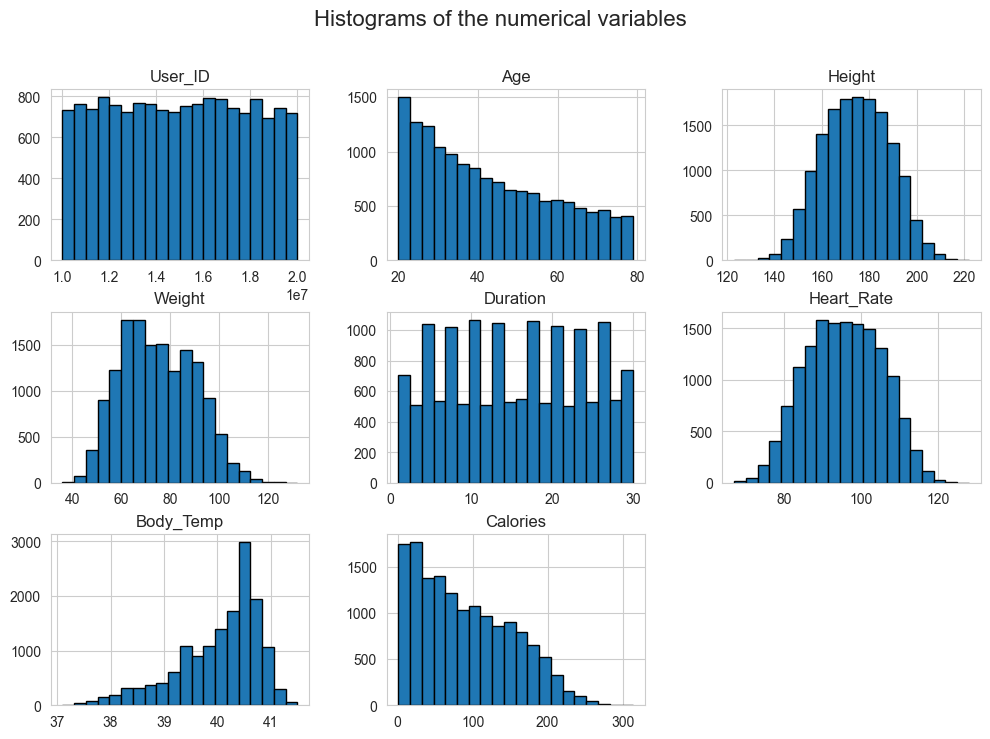

In [20]:
data.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of the numerical variables", fontsize=16)
plt.show()

#### Boxplot for calorie burned by gender:

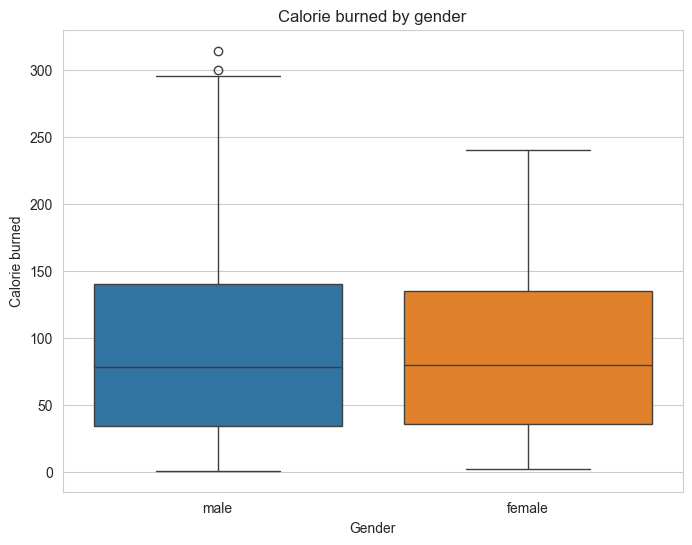

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gender", y="Calories", data=data, hue="Gender", legend=False)
plt.xlabel("Gender")
plt.ylabel("Calorie burned")
plt.title("Calorie burned by gender")
plt.show()

#### Scatterplot of duration vs. calories burned:

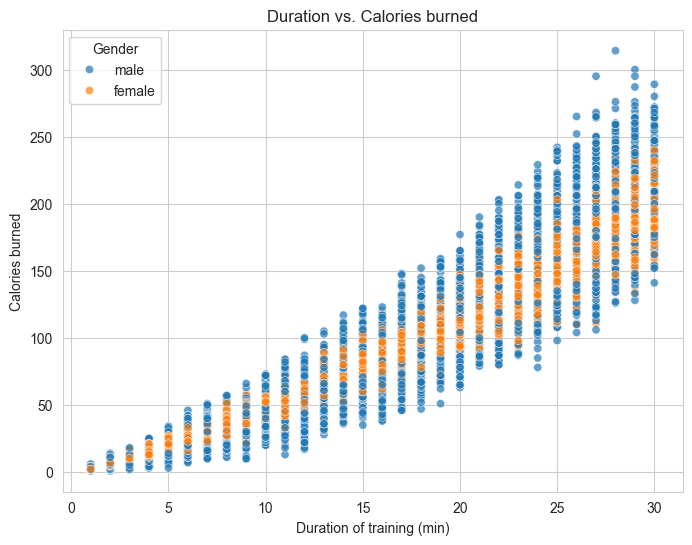

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Duration", y="Calories", hue="Gender", data=data, alpha=0.7)
plt.xlabel("Duration of training (min)")
plt.ylabel("Calories burned")
plt.title("Duration vs. Calories burned")
plt.show()

#### Linediagram of the heartrate compared to calories burned:

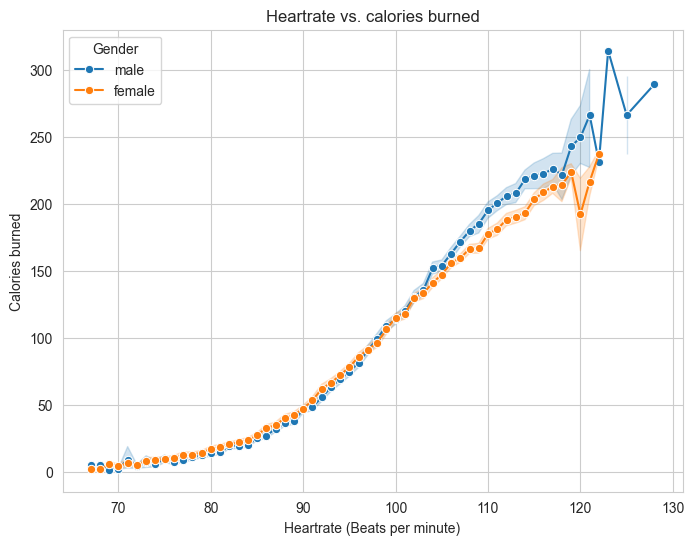

In [52]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="Heart_Rate", y="Calories", hue="Gender", data=data, marker="o")
plt.xlabel("Heartrate (Beats per minute)")
plt.ylabel("Calories burned")
plt.title("Heartrate vs. calories burned")
plt.show()